In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import pandas as pd


In [11]:
# reading the Dataset
Customer_df = pd.read_csv("Customers.csv")
print(Customer_df.head())
print("*****************")
products_df = pd.read_csv("Products.csv")
print(products_df.head())
print("*****************")
Transaction_df = pd.read_csv("Transactions.csv")
print(Transaction_df.head())



  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
*****************
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
*****************
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-

In [14]:
# Customer_df 

print("Custtomer Dataset Overview:")
print(Customer_df.info())
print("----------")
print(Customer_df.describe())# checking Mean,mode,median 
print("----------")
print(Customer_df.isnull().sum())# checking Missing values 

Custtomer Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
----------
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
----------
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


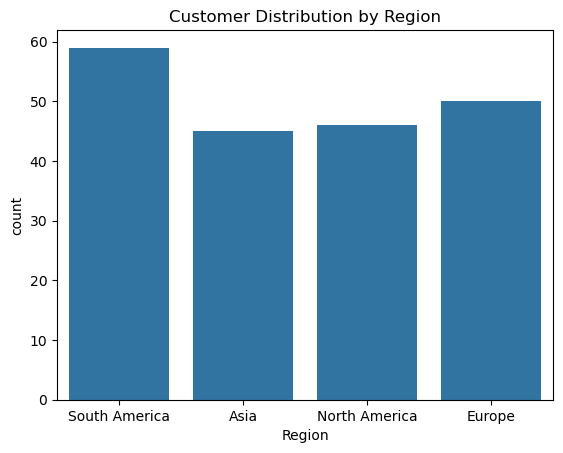

In [15]:
# Distribution of Customers by region 

sns.countplot(x='Region',data=Customer_df)
plt.title('Customer Distribution by Region')
plt.show()

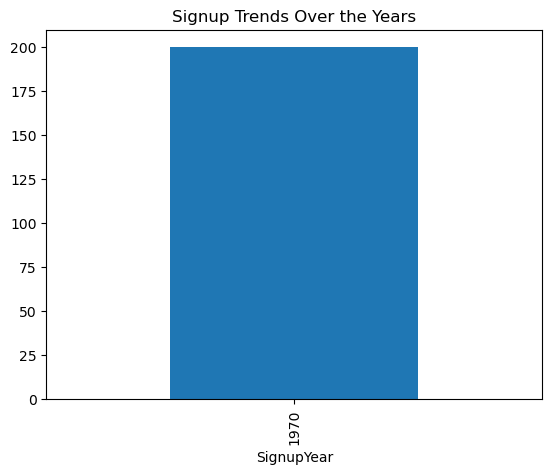

In [17]:
Customer_df['SignupDate'] = pd.to_datetime(Customer_df['SignupDate'])
Customer_df['SignupYear'] = Customer_df['SignupDate'].dt.year
Customer_df['SignupDate'] = Customer_df['SignupDate'].dt.month
Signup_trends = Customer_df.groupby('SignupYear').size()
Signup_trends.plot(kind='bar',title='Signup Trends Over the Years')
plt.show()

# EDA for  Products Dataset

In [19]:
print("Products Dataset Overview:")
print(products_df.info())
print("----------")
print(products_df.describe())# checking mean mode ,std
print("----------")
print(products_df.isnull().sum())# checking Missing values 

Products Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
----------
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
----------
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


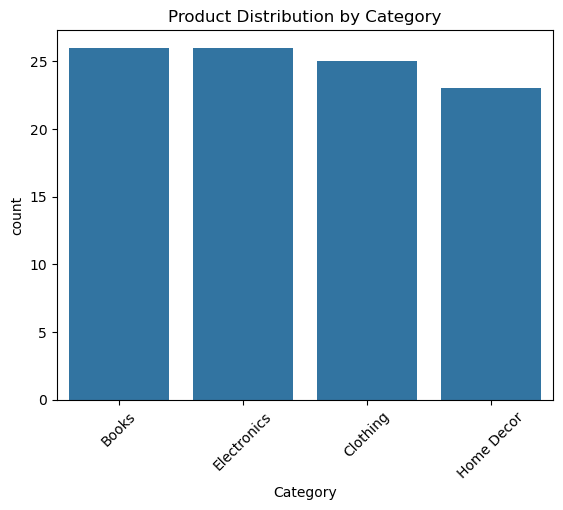

In [20]:
sns.countplot(x='Category',data=products_df,order=products_df['Category'].value_counts().index)
plt.title('Product Distribution by Category')
plt.xticks(rotation = 45)
plt.show()

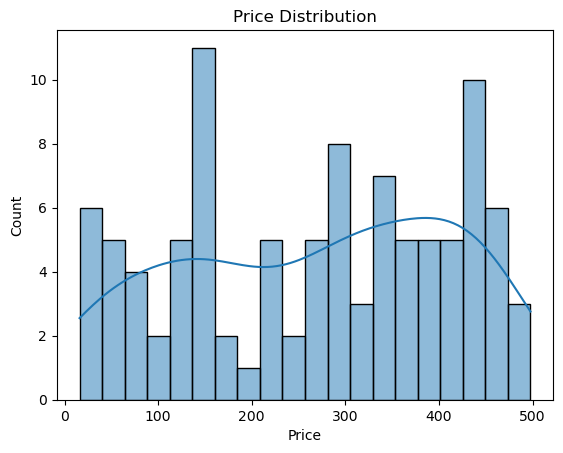

In [21]:
# price distribution 
sns.histplot(products_df['Price'],kde=True,bins=20)
plt.title('Price Distribution')
plt.show()

# EDA ON Transcation DataSet

In [22]:
print("Transcation Dataset Overview:")
print(Transaction_df.info())
print("----------")
print(Transaction_df.describe())# checking mean mode ,std
print("----------")
print(Transaction_df.isnull().sum())# checking Missing values 

Transcation Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
----------
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  

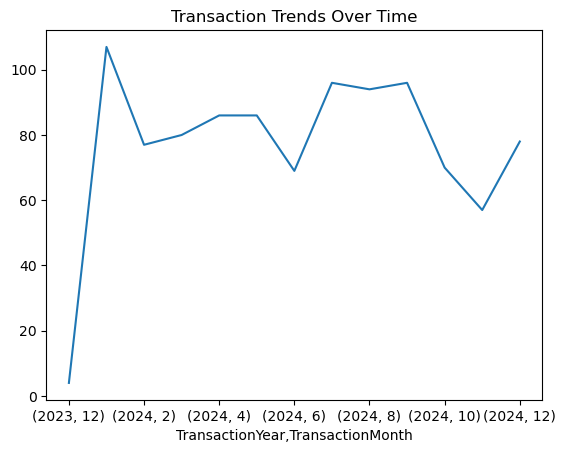

In [23]:
# Transaction trends over time
Transaction_df['TransactionDate'] = pd.to_datetime(Transaction_df['TransactionDate'])
Transaction_df['TransactionYear'] = Transaction_df['TransactionDate'].dt.year
Transaction_df['TransactionMonth'] = Transaction_df['TransactionDate'].dt.month
transaction_trends = Transaction_df.groupby(['TransactionYear', 'TransactionMonth']).size()
transaction_trends.plot(kind='line', title='Transaction Trends Over Time')
plt.show()

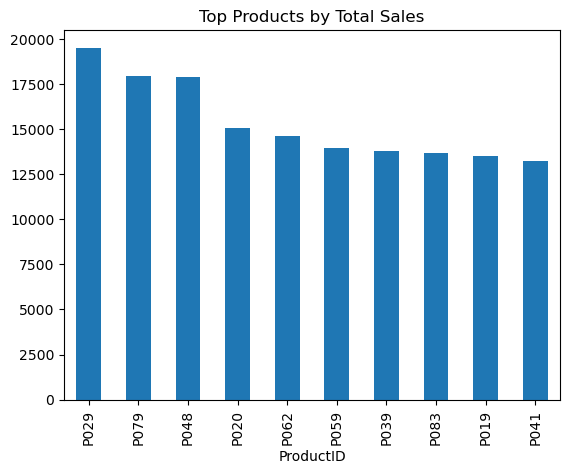

In [24]:
# Top products by total sales
top_products = Transaction_df.groupby('ProductID')['TotalValue'].sum().nlargest(10)
top_products.plot(kind='bar', title='Top Products by Total Sales')
plt.show()

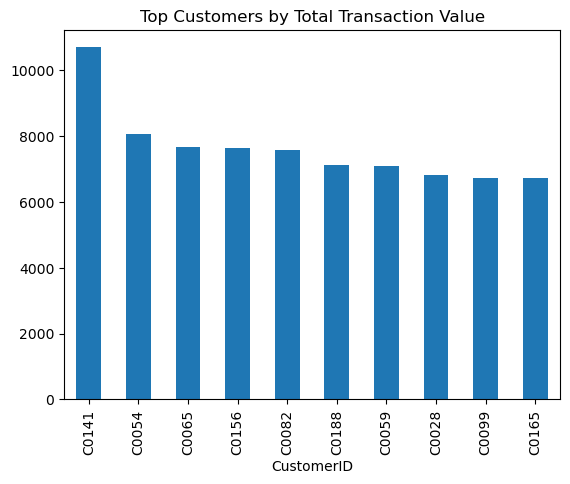

In [25]:
# Top customers by transaction volume
top_customers = Transaction_df.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
top_customers.plot(kind='bar', title='Top Customers by Total Transaction Value')
plt.show()

# 4. Cross-Dataset EDA

In [29]:
# Merge datasets
merged_data = Transaction_df.merge(Customer_df, on='CustomerID', how='left').merge(products_df, on='ProductID', how='left')

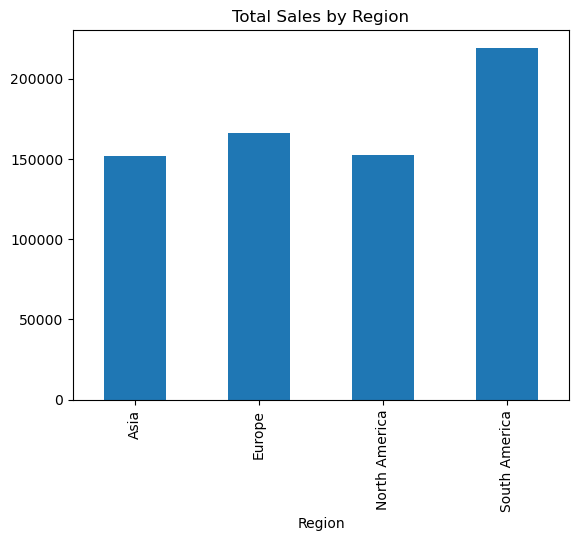

In [30]:
# Sales by region
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum()
sales_by_region.plot(kind='bar', title='Total Sales by Region')
plt.show()

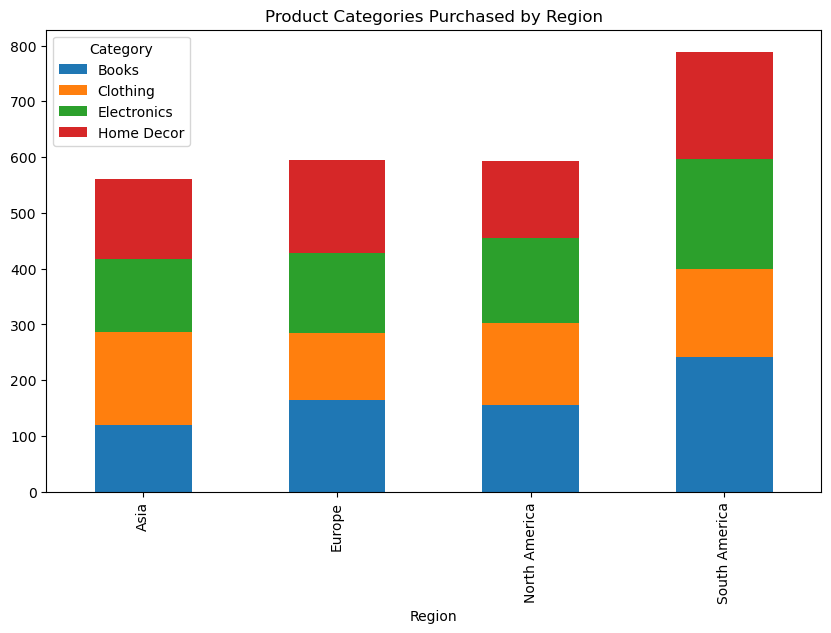

In [31]:
# Most purchased categories by region
category_region = merged_data.groupby(['Region', 'Category'])['Quantity'].sum().unstack()
category_region.plot(kind='bar', stacked=True, figsize=(10, 6), title='Product Categories Purchased by Region')
plt.show()

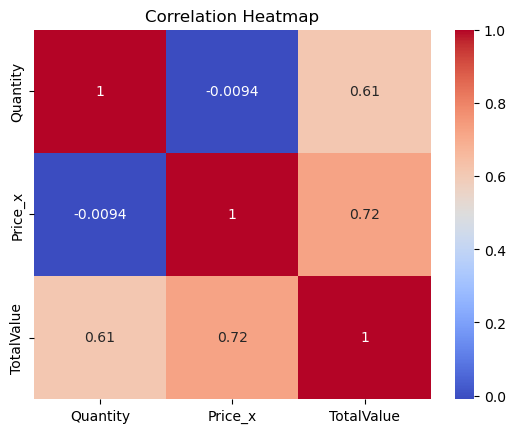

In [37]:
# Correlation heatmap
correlation = merged_data[['Quantity', 'Price_x', 'TotalValue']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()